https://www.tensorflow.org/tutorials/keras/classification

In [1]:
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.7.0


In [7]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0


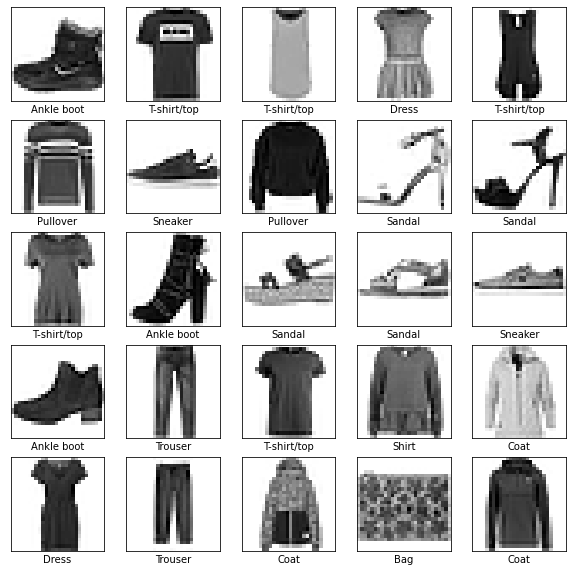

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [11]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5000 - accuracy: 0.8247
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3786 - accuracy: 0.8635
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3373 - accuracy: 0.8763
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3132 - accuracy: 0.8855
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2948 - accuracy: 0.8914
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2811 - accuracy: 0.8954
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2682 - accuracy: 0.8998
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2576 - accuracy: 0.9039
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2476 - accuracy: 0.9075
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.237

In [12]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)


313/313 - 1s - loss: 0.3332 - accuracy: 0.8836 - 716ms/epoch - 2ms/step

Test accuracy: 0.8835999965667725


In [190]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
  
def plot_value_array_asis(predictions_array):
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

def plot_grid(num_rows, num_cols):
  # Plot the first X test images, their predicted labels, and the true labels.
  # Color correct predictions in blue and incorrect predictions in red.

  num_images = num_rows*num_cols
  plt.figure(figsize=(2*2*num_cols, 2*num_rows))
  for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
  plt.tight_layout()
  plt.show()


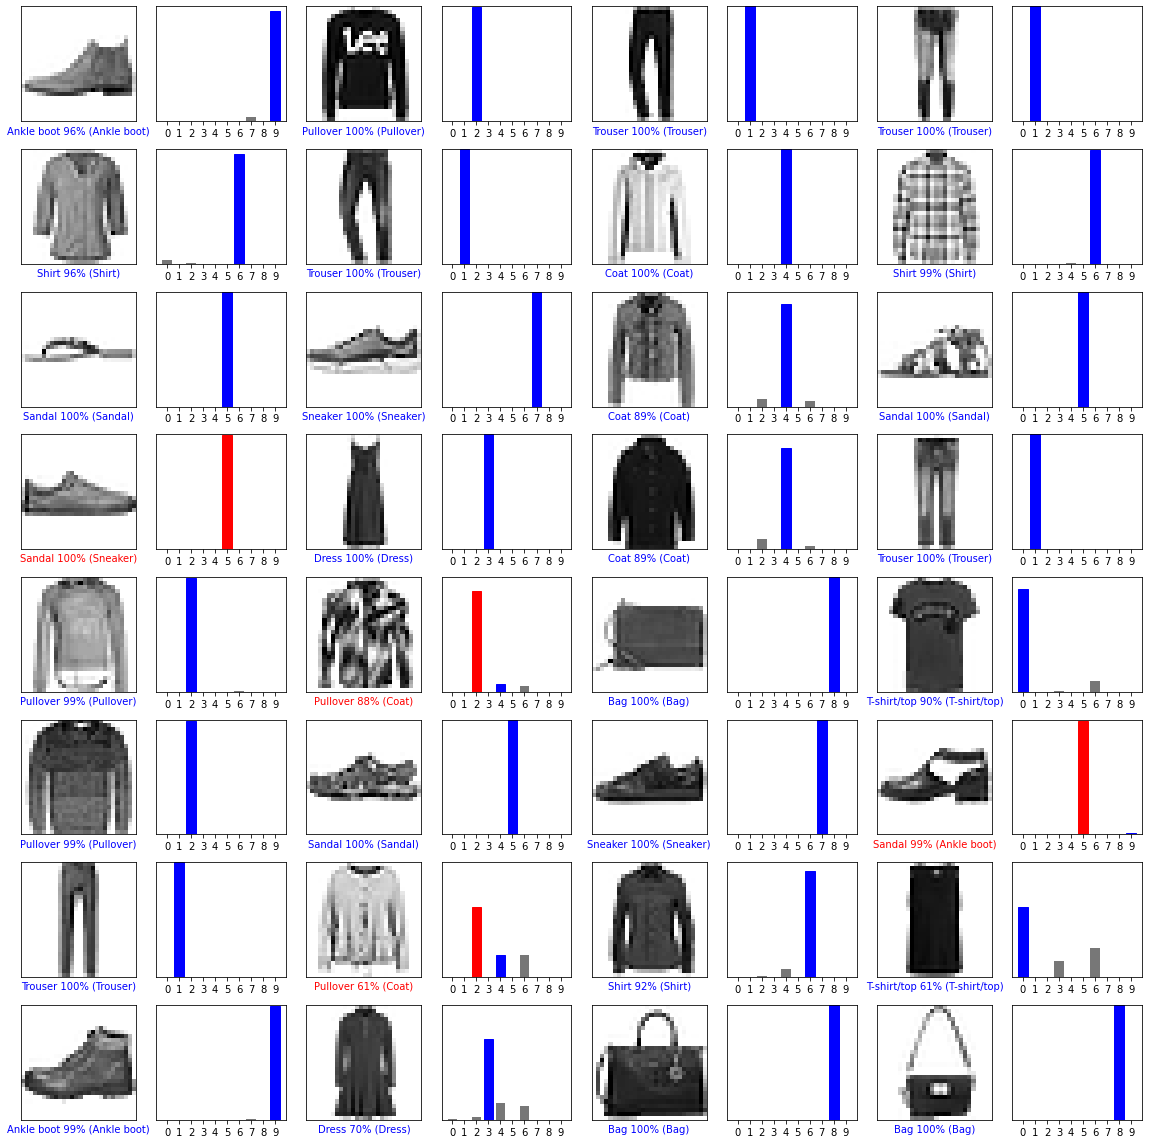

In [87]:
plot_grid(8,4)

In [88]:
def test_one(i):
    print(f"Testing image {i}")
    
    # Grab an image from the test dataset.
    img = test_images[i]
    print(img.shape)

    # Add the image to a batch where it's the only member.
    img = (np.expand_dims(img,0))
    print(img.shape)

    predictions_single = probability_model.predict(img)
    print(predictions_single)
    
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    plot_image(i, predictions_single[0], test_labels, test_images)
    plt.subplot(1,2,2)
    plot_value_array(i, predictions_single[0], test_labels)
    _ = plt.xticks(range(10), class_names, rotation=45)
    plt.tight_layout()
    plt.show()

Testing image 7950
(28, 28)
(1, 28, 28)
[[3.8332866e-09 1.0000000e+00 1.2369097e-11 8.4450011e-09 5.3560854e-09
  4.8945407e-13 8.5562696e-10 9.3853673e-21 1.4981881e-12 7.6365875e-16]]


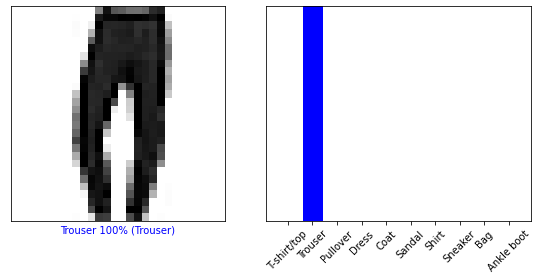

In [89]:
test_one(np.random.randint(test_images.shape[0]))

In [90]:
def get_penultimate_layer_model(model):
    return tf.keras.Model(inputs=model.input,outputs=model.layers[-2].output)

In [116]:
some_img_0 = (np.expand_dims(test_images[10],0))
some_img_1 = (np.expand_dims(test_images[11],0))

In [94]:
model.layers[-2].output

<KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'dense_2')>

In [92]:
def feature_space_dist(model, a, b):
    pred_a = model.predict(a)
    pred_b = model.predict(b)
    return np.linalg.norm(pred_b-pred_a)**2

def image_space_dist(a,b):
    return np.lonalg.norm(b-a,ord='fro')

In [110]:
def get_forward_gradients(model):
    input_tensor = model.layers[0].input
    target_features = tf.keras.Input(shape=model.layers[-2].output.shape[1:])
    forward_loss = tf.norm(model.layers[-2].output - target_features)
    # return tf.gradients(forward_loss,input_tensor)
    return (forward_loss, input_tensor)

In [118]:
model.layers[0].output

<KerasTensor: shape=(None, 784) dtype=float32 (created by layer 'flatten_1')>

In [214]:
def compute_forward_gradient(model,x_val,t_val):
    x_mu = tf.constant(x_val)
    t_mu = tf.constant(t_val)
    with tf.GradientTape() as tape:
        tape.watch(x_mu)
        x_out = model(x_mu)
        t_out = model(t_mu)
        loss = tf.norm(x_out - t_out)**2
        return tape.gradient(loss,x_mu)

# Forward update: adjust x toward t's feature-space values
def forward_update(model,x_val,t_val,rate_lambda):
    return x_val - rate_lambda * compute_forward_gradient(model,x_val,t_val)

# Backward update: adjust x toward base image
def backward_update(x_hat_val,b_val,rate_lambda,coef_beta):
    return (x_hat_val + rate_lambda*coef_beta*b_val) / (1 + rate_lambda*coef_beta)

In [216]:
# Naive implementation of Algorithm 1: Poisoning Example Generation
def algo_1(model,t_val,b_val, rate_lambda, coef_beta, n_iter):
    x = b_val
    for i in range(n_iter):
        x = forward_update(model,x,t_val,rate_lambda)
        x = backward_update(x,b_val,rate_lambda,coef_beta)
    return x

In [213]:
# Copied from authors' code
_beta = 0.25*(2048/float(some_img_0.shape[0]*some_img_0.shape[1]*some_img_0.shape[2]))**2
print(_beta)

1.705955851728446


In [207]:
def demo_algo_1(model, idx_t, idx_b, rate_lambda, coef_beta, n_iter):
    img_t = test_images[idx_t]
    img_b = test_images[idx_b]
    
    img_p = algo_1(get_penultimate_layer_model(model),np.expand_dims(img_t,0),np.expand_dims(img_b,0), rate_lambda, coef_beta,n_iter)
    img_p = np.squeeze(img_p)
    plt.figure(figsize=(12,6))
    plt.subplot(2,3,1)
    plt.imshow(img_t, cmap=plt.cm.binary)
    plt.subplot(2,3,2)
    plt.imshow(img_b, cmap=plt.cm.binary)
    plt.subplot(2,3,3)
    plt.imshow(img_p, cmap=plt.cm.binary)
    plt.subplot(2,3,4)
    plot_value_array(idx_t, np.squeeze(probability_model.predict(np.expand_dims(img_t,0))), test_labels)
    plt.subplot(2,3,5)
    plot_value_array(idx_b, np.squeeze(probability_model.predict(np.expand_dims(img_b,0))), test_labels)
    plt.subplot(2,3,6)
    plot_value_array(idx_b, np.squeeze(probability_model.predict(np.expand_dims(img_p,0))), test_labels)
    plt.tight_layout()
    plt.show()
    

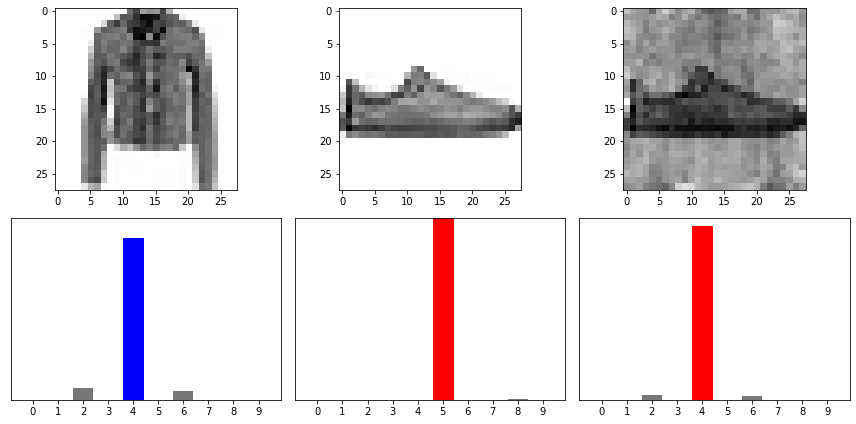

In [212]:
demo_algo_1(model,10,12,0.001,_beta,100)